In [62]:
#Import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
#Read csv file
df=pd.read_csv('train.csv')

In [64]:
#Display first 5 records
df.head()

,Labels,Text,Text_Tag
0,1,Says the Annies List political group supports ...,abortion
1,2,When did the decline of coal start? It started...,"energy,history,job-accomplishments"
2,3,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy
3,1,Health care reform legislation is likely to ma...,health-care
4,2,The economic turnaround started at the end of ...,"economy,jobs"


In [65]:
#Display number of rows and columns
df.shape

(10240, 3)

In [66]:
#Display dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Labels    10240 non-null  int64 
 1   Text      10240 non-null  object
 2   Text_Tag  10238 non-null  object
dtypes: int64(1), object(2)
memory usage: 240.1+ KB


In [67]:
#Display descriptive statistics of column with numeric value
df.describe()

,Labels
count,10240.000000
mean,2.328613
std,1.650933
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,5.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


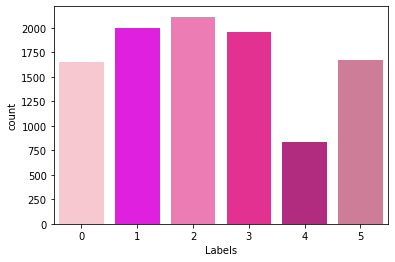

In [86]:
#Display count in each categorical bin using bars
sns.countplot(df['Labels'], palette=["#FFC0CB","#FF00FF", "#FF69B4", "#FF1493", "#C71585", "#DB7093"])

In [68]:
#import libraries
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score

In [69]:
train_text = pd.Series(df['Text'].tolist()).astype(str)

(-0.5, 1299.5, 949.5, -0.5)

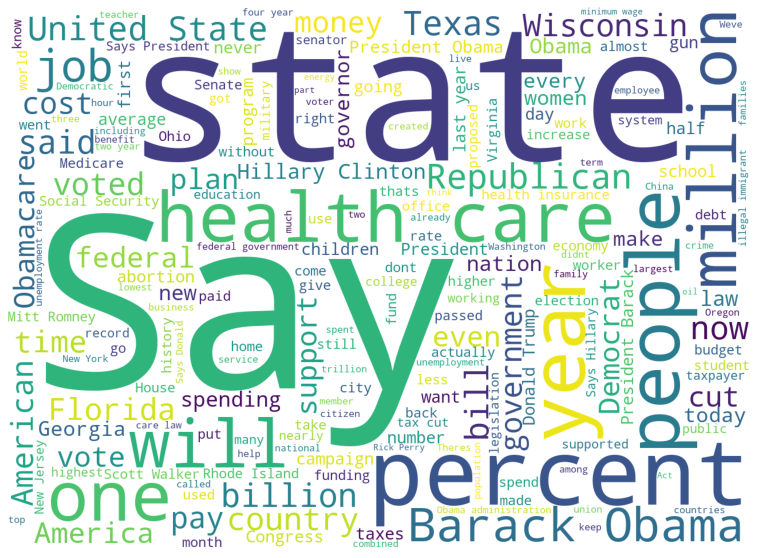

In [73]:
#Word cloud for "Text" column
from wordcloud import WordCloud
cloud = WordCloud(width=1300, height=950, background_color="white").generate(" ".join(train_text.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

In [71]:
train_texttag = pd.Series(df['Text_Tag'].tolist()).astype(str)

(-0.5, 1299.5, 949.5, -0.5)

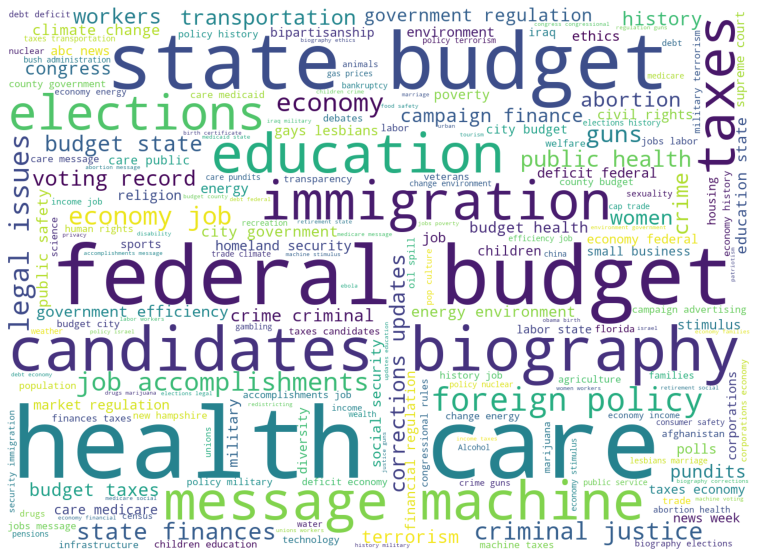

In [74]:
#Word cloud for "Text_Tag" column
cloud = WordCloud(width=1300, height=950, background_color="white").generate(" ".join(train_texttag.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

In [91]:
import nltk
nltk.download('stopwords')
stopset=set(stopwords.words('english'))
vector=TfidfVectorizer(use_idf=True,lowercase=True,strip_accents='ascii',stop_words=stopset)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
vector.fit(df)

TfidfVectorizer(stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...},
                strip_accents='ascii')

In [33]:
y=df.Labels
x=vector.fit_transform(df.Text)

In [34]:
x.shape

(10240, 12061)

In [35]:
y.shape

(10240,)

In [37]:
print(x)

  (0, 3252)	0.34383539825672055
  (0, 615)	0.291994452646968
  (0, 11186)	0.4135724297617053
  (0, 10931)	0.2779535206879464
  (0, 10614)	0.27033286247495936
  (0, 5075)	0.29519135963079446
  (0, 8289)	0.28805538635305655
  (0, 6575)	0.32547970735785825
  (0, 1035)	0.43192812066056746
  (0, 9587)	0.11190845341839402
  (1, 749)	0.2059771366125641
  (1, 1942)	0.2960878588752092
  (1, 4870)	0.22844050117590908
  (1, 8467)	0.15521864047896095
  (1, 1514)	0.30750358190632776
  (1, 11028)	0.20727829358907138
  (1, 4820)	0.22981688420803537
  (1, 7348)	0.28529705793190546
  (1, 10332)	0.5155835539220387
  (1, 10331)	0.2738813349007869
  (1, 2450)	0.28168714016819435
  (1, 3159)	0.3189193049374463
  (2, 5941)	0.2841866853225673
  (2, 3651)	0.39701071509484137
  (2, 1549)	0.3309512771395015
  :	:
  (10237, 7182)	0.1624731603531382
  (10237, 10097)	0.36394750688615934
  (10237, 9725)	0.3453362002774513
  (10237, 10871)	0.14867885075009182
  (10237, 9587)	0.08522324489882203
  (10238, 6533)	0.444

In [90]:
#Most frequent word
max(vector.get_feature_names_out())

'zuckerbergs'

In [46]:
#Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4,test_size=0.33)

In [47]:
x_train.shape

(6860, 12061)

In [48]:
y_test.shape

(3380,)

In [49]:
#Applying the Naive Bayes Model
clf = naive_bayes.MultinomialNB()

#Fitting the model with the data
model=clf.fit(x_train, y_train)

In [50]:
#Getting the prediction
p=model.predict(x_test)
p

array([3, 3, 0, ..., 3, 3, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


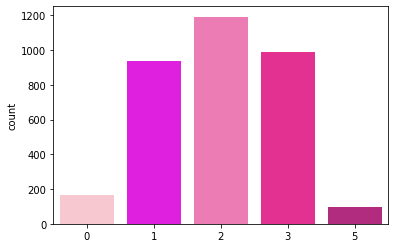

In [87]:
sns.countplot(p, palette=["#FFC0CB","#FF00FF", "#FF69B4", "#FF1493", "#C71585", "#DB7093"])

In [52]:
#Import library
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [53]:
#Applying the Decision Tree model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [54]:
#Fitting the model with the data
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [55]:
#Getting the prediction
pt=classifier.predict(x_test)
pt

array([4, 2, 1, ..., 0, 2, 2])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


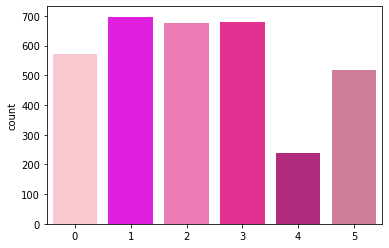

In [88]:
sns.countplot(pt, palette=["#FFC0CB","#FF00FF", "#FF69B4", "#FF1493", "#C71585", "#DB7093"])